In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nba_df = pd.read_csv('nba_rankings_2014-2020.csv')
nba_df.drop(['Unnamed: 0'], axis=1, inplace=True)
nba_df.head()

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,3.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,1.1,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,1.1,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [5]:
nba_df.corr()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
AGE,1.000000,0.173402,0.251403,0.008028,0.169326,0.108170,0.098531,0.099760,0.052201,0.170643,...,0.143594,0.067864,0.083245,0.001881,0.077649,0.127207,0.031516,0.026833,0.200071,0.148941
GP,0.173402,1.000000,0.811006,0.758230,0.610115,0.458618,0.473570,0.455109,0.216202,0.314098,...,0.302519,0.365332,0.391920,0.263327,0.474151,0.497862,0.307070,0.100583,0.212770,0.462467
W,0.251403,0.811006,1.000000,0.233491,0.471632,0.387434,0.394201,0.360985,0.211641,0.292756,...,0.276663,0.275766,0.330111,0.231240,0.332626,0.423732,0.275515,0.131800,0.573225,0.484431
L,0.008028,0.758230,0.233491,1.000000,0.488434,0.330473,0.347781,0.354117,0.123476,0.195787,...,0.194477,0.299873,0.283500,0.179958,0.417370,0.355246,0.203320,0.020290,-0.285189,0.228773
MIN,0.169326,0.610115,0.471632,0.488434,1.000000,0.868578,0.871957,0.881507,0.147296,0.590929,...,0.653868,0.764620,0.722831,0.343542,0.691761,0.892243,0.472198,0.191849,0.235107,0.779156
PTS,0.108170,0.458618,0.387434,0.330473,0.868578,1.000000,0.987229,0.981449,0.174705,0.633581,...,0.672748,0.833446,0.634212,0.317887,0.551723,0.940458,0.545020,0.282556,0.287768,0.895012
FGM,0.098531,0.473570,0.394201,0.347781,0.871957,0.987229,1.000000,0.975969,0.232816,0.558285,...,0.649118,0.821579,0.623758,0.365415,0.575721,0.946452,0.575785,0.269953,0.274328,0.893610
FGA,0.099760,0.455109,0.360985,0.354117,0.881507,0.981449,0.975969,1.000000,0.071872,0.655034,...,0.691004,0.834736,0.650017,0.257583,0.537784,0.914512,0.487440,0.267373,0.231419,0.850169
FG%,0.052201,0.216202,0.211641,0.123476,0.147296,0.174705,0.232816,0.071872,1.000000,-0.191226,...,-0.022259,0.099206,0.022892,0.422141,0.306638,0.258470,0.285939,0.029176,0.157599,0.275127
3PM,0.170643,0.314098,0.292756,0.195787,0.590929,0.633581,0.558285,0.655034,-0.191226,1.000000,...,0.463895,0.444679,0.441468,-0.133097,0.227214,0.480291,0.016882,0.116763,0.257049,0.472170


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [7]:
X = nba_df.drop(['PLAYER', 'TEAM', 'SEASON', 'rankings', 'FP'], axis=1)
y = nba_df['rankings']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Number of Features Selected from RFECV: 18


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


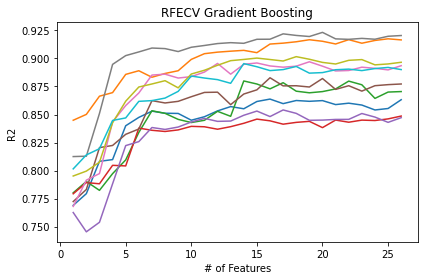

In [9]:
rfe = RFECV(GradientBoostingRegressor(random_state=0, max_depth=3, subsample=0.8), cv=KFold(10), scoring='r2')
rfe.fit(X_train, y_train)
print('Number of Features Selected from RFECV:',  rfe.n_features_)
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.ylabel('R2')
plt.xlabel('# of Features')
plt.title('RFECV Gradient Boosting')
plt.tight_layout()

In [10]:
X_train = X_train.loc[:, rfe.support_]
X_test = X_test.loc[:, rfe.support_]
# drop FGM
X_train.drop(['FGM'], axis=1, inplace=True)
X_test.drop(['FGM'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
xgb_param_grid = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                  "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight": [ 1, 3, 5, 7 ], 'subsample': [0.6, 0.7, 0.8, 0.9],
                  'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
xgb_pipe = (XGBRegressor(random_state=0))
xgb_grid = RandomizedSearchCV(xgb_pipe, xgb_param_grid, scoring='r2')
xgb_grid.fit(X_train, y_train)

[03:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(estimator=XGBRegressor(),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='r2')

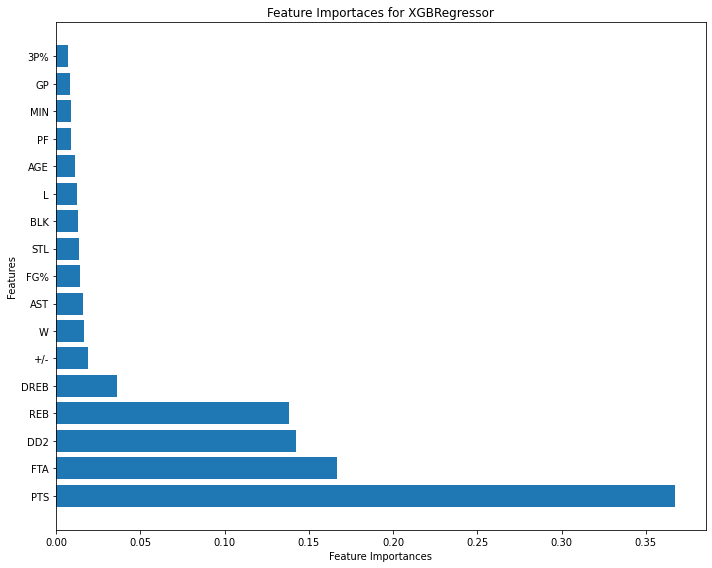

In [12]:
series = pd.Series(xgb_grid.best_estimator_.feature_importances_, X_train.columns)
series.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,8))
plt.barh(series.index, series.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importaces for XGBoost')
plt.tight_layout()

In [13]:
print('XGB best params: ', xgb_grid.best_params_)
print('R2: ', xgb_grid.score(X_test, y_test))

XGB best params:  {'subsample': 0.6, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.7}
R2:  0.8866268762246508


In [14]:
import joblib

In [15]:
filename = 'finalized_model.sav'
joblib.dump(xgb_grid, filename)
 
# some time later...
 


['finalized_model.sav']

In [16]:
# load the model from disk
import joblib
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)
y_pred = xgb_grid.predict(X_test)


[03:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
y_pred = xgb_grid.predict(X_test)

In [18]:
y_pred

array([78.90971 , 71.25422 , 70.018616, 72.75368 , 73.72631 , 79.351364,
       66.6602  , 71.60761 , 73.58962 , 70.80572 , 76.785995, 75.37919 ,
       72.85703 , 82.13594 , 71.35854 , 81.40309 , 72.60122 , 74.65233 ,
       93.94599 , 71.37874 , 72.979645, 73.80865 , 71.19587 , 67.98252 ,
       78.7353  , 75.18086 , 76.763016, 69.70823 , 74.83115 , 90.94002 ,
       78.28201 , 78.223305, 74.77643 , 73.34248 , 71.50233 , 73.97392 ,
       72.92892 , 82.117744, 87.07641 , 69.16753 , 74.03964 , 78.5778  ,
       80.48386 , 75.7689  , 71.015305, 72.928345, 71.71081 , 86.252396,
       80.21368 , 76.6421  , 81.62752 , 77.21465 , 71.14428 , 91.46462 ,
       71.099915, 84.01138 , 73.66972 , 72.84959 , 74.02461 , 74.640205,
       69.76914 , 77.788956, 89.50797 , 75.79325 , 80.66322 , 67.49038 ,
       79.527214, 71.40215 , 74.30683 , 73.83618 , 69.76982 , 77.9583  ,
       74.73644 , 72.82429 , 76.77415 , 93.07587 , 74.47711 , 85.639244,
       83.77505 , 77.666466, 74.64075 , 73.82615 , 

In [20]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.9445806699040284